# Lendo arquivos CSV 

In [ ]:
# Documentação pandas para leitura de arquivo csv
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [4]:
# Importar biblioteca pandas: 
import pandas as pd 

path_file = ''
name_file = 'titanic.csv'


# Ler arquivo csv
csv_df = pd.read_csv(path_file+name_file) 

In [5]:
# Verificar 5 primeiras linhas do dataframe que está na memória 
csv_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Verificar quantidade de linhas e colunas(variáveis) na tabela
csv_df.shape

(891, 12)

In [7]:
# Vrificando os tipos de variáveis que temos na tabela
csv_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Lendo arquivos Parquet (Não particionados)

In [8]:
# Documentação pandas para leitura de arquivo no formato parquet não particionado
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_parquet.html

In [13]:
# Instalando pyarrow (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install pyarrow

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# Instalando ijson (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install ijson

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
# Lendo arquivo parquet 
parquet_df = pd.read_parquet('file.parquet', engine='pyarrow')

In [15]:
parquet_df.head()

,b'id',b'target',b'ps_ind_01',b'ps_ind_02_cat',b'ps_ind_03',b'ps_ind_04_cat',b'ps_ind_05_cat',b'ps_ind_06_bin',b'ps_ind_07_bin',b'ps_ind_08_bin',...,b'ps_calc_11',b'ps_calc_12',b'ps_calc_13',b'ps_calc_14',b'ps_calc_15_bin',b'ps_calc_16_bin',b'ps_calc_17_bin',b'ps_calc_18_bin',b'ps_calc_19_bin',b'ps_calc_20_bin'
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [16]:
parquet_df.shape

(595212, 59)

# Lendo arquivos JSON (JavaScript Object Notation)

In [116]:
import pandas as pd

# Definindo JSON de forma manual
end_turma ="""
        {
            "Nome":{
                     "0":"Bruno Jardim",
                     "1":"Tâmara A. Jardim",
                     "2":"Rauhe Abdulhamid"
                         },
            "Latitude":{
                    "0":-23.6273344,
                    "1":-23.6273344,
                    "2":-23.6344377
                    
                        },
            "Longitude":{
                    "0":-46.6369415,
                    "1":-46.6369415,
                    "2":-46.7246573                    
                         }
        }"""

# Traduzindo JSON para um dataframe (pandas)
df = pd.read_json(end_turma)

print('Dataframe gerado pelo JSON')
df.head(10)

Dataframe gerado pelo JSON


,Latitude,Longitude,Nome
0,-23.627334,-46.636941,Bruno Jardim
1,-23.627334,-46.636941,Tâmara A. Jardim
2,-23.634438,-46.724657,Rauhe Abdulhamid


In [117]:
# Vamos colocar os endereços com latitude e longitude no Mapa
# http://www.mapcoordinates.net/pt

import folium

location = df['Latitude'].mean(), df['Longitude'].mean()
locationlist = df[["Latitude","Longitude"]].values.tolist()
labels = df["Nome"].values.tolist()

m = folium.Map(location=location, zoom_start=12)
for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(m)
m

# Outro Exemplo com mais dados

In [118]:
import pandas as pd

data = """
{
    "id":{
            "0":411083201,
            "1":418513660,
            "2":528057543,
            "3":586713622,
            "4":647656728,
            "5":647656785,
            "6":1493456455,
            "7":1493456487,
            "8":2005894602,
            "9":2095344770,
            "10":2187987262,
            "11":2411692096,
            "12":2411698457,
            "13":2474058013,
            "14":2474058022,
            "15":2881830804,
            "16":2895323815,
            "17":2895323816,
            "18":2983919102,
            "19":3321734312,
            "20":3641568148,
            "21":4010355532,
            "22":4030622426,
            "23":4037746568,
            "24":4055719117,
            "25":4259001279,
            "26":4340535594,
            "27":4625994189,
            "28":4666687025
            },
    "Latitude":{"0":37.7673162,"1":37.7645003,"2":37.7682118,"3":37.7648492,"4":37.771672,"5":37.7721693,"6":37.7763591,"7":37.777046,"8":37.7690716,"9":37.766319,"10":37.7664253,"11":37.7770377,"12":37.7763106,"13":37.7739857,"14":37.774748,"15":37.775488,"16":37.7752166,"17":37.7759142,"18":37.7744588,"19":37.7760172,"20":37.7762395,"21":37.765011,"22":37.769195,"23":37.7750452,"24":37.7726713,"25":37.7717782,"26":37.7745253,"27":37.7768943,"28":37.7752822},"Longitude":{"0":-122.4219479,"1":-122.4216812,"2":-122.4223857,"3":-122.4320119,"4":-122.4331366,"5":-122.4307254,"6":-122.4180877,"7":-122.4172737,"8":-122.4277243,"9":-122.417422,"10":-122.4290387,"11":-122.4175698,"12":-122.4232558,"13":-122.424226,"14":-122.4226877,"15":-122.4159,"16":-122.4195185,"17":-122.4191912,"18":-122.4205881,"19":-122.4314951,"20":-122.4168763,"21":-122.4226685,"22":-122.4315398,"23":-122.4210561,"24":-122.4220741,"25":-122.4167145,"26":-122.4306476,"27":-122.4245402,"28":-122.4161381},"Cafe Name":{"0":"Four Barrel Coffee","1":"Muddy Waters","2":"Carlin\'s Cafe","3":"Peet\'s Coffee & Tea","4":"Nectar","5":"Cafe International","6":"Ma\'velous","7":"Starbucks","8":"Starbucks","9":"Flying Pig Bistro","10":"Church Street Cafe","11":"Anderson Bakery","12":"Blue Bottle Coffee","13":"mercury cafe","14":"gourmet and more","15":"Cumaica","16":"All Star Cafe","17":"Boston Cafe","18":"Javalencia Cafe","19":"Alamo Square Cafe","20":"Blue Bottle Coffee","21":"Stanza","22":"Duboce Park Cafe","23":"Eden Cafe","24":"Delessio Market & Bakery","25":"Gaslamp Cafe","26":"The Center SF Tea House","27":"Cafe la Vie","28":"Peet\'s Coffee"},"Street":{"0":"Valencia Street","1":"Valencia Street","2":"Valencia Street","3":"Market Street","4":"Haight Street","5":"Haight Street","6":"Market Street","7":"Market Street","8":"Market Street","9":"South Van Ness Avenue","10":null,"11":null,"12":null,"13":"Octavia Street","14":null,"15":"Mission Street","16":"Market Street","17":"Van Ness Avenue","18":"Market Street","19":null,"20":"Market Street","21":null,"22":"Sanchez Street","23":"Franklin Street","24":"Market Street","25":"Howard Street","26":"Fillmore Street","27":"Octavia Street","28":null}}"""

df = pd.read_json(data)

df.head(10)

,Cafe Name,Latitude,Longitude,Street,id
0,Four Barrel Coffee,37.767316,-122.421948,Valencia Street,411083201
1,Muddy Waters,37.764500,-122.421681,Valencia Street,418513660
10,Church Street Cafe,37.766425,-122.429039,None,2187987262
11,Anderson Bakery,37.777038,-122.417570,None,2411692096
12,Blue Bottle Coffee,37.776311,-122.423256,None,2411698457
13,mercury cafe,37.773986,-122.424226,Octavia Street,2474058013
14,gourmet and more,37.774748,-122.422688,None,2474058022
15,Cumaica,37.775488,-122.415900,Mission Street,2881830804
16,All Star Cafe,37.775217,-122.419518,Market Street,2895323815
17,Boston Cafe,37.775914,-122.419191,Van Ness Avenue,2895323816


In [119]:
import folium
location = df['Latitude'].mean(), df['Longitude'].mean()
locationlist = df[["Latitude","Longitude"]].values.tolist()
labels = df["Cafe Name"].values.tolist()

m = folium.Map(location=location, zoom_start=14)
for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(m)
m

In [126]:
# Exemplo para um único endereço
latitude=-23.6273344
longitude=-46.6369415
raio_circulo = 30
nome_local='Minha área, cai fora !!'
zoom_start=20

#-------- Gerar Mapa --------------------------
location = list([latitude,longitude])
casa = folium.Map(location=location, zoom_start=zoom_start)
labels = list(['Casa'])
popup = folium.Popup(labels, parse_html=True)
folium.Circle(location, raio_circulo, fill=True).add_child(folium.Popup(nome_local, parse_html=True)).add_to(casa)
casa

# Exemplo carregando dados de API online (URL)

In [ ]:
# https://catalog.data.gov/dataset/traffic-violations-56dda

In [1]:
import urllib.request, json 
with urllib.request.urlopen("https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.json?accessType=DOWNLOAD") as url:
    data = json.loads(url.read().decode())
    #print(data)

In [2]:
# Gravando arquivo que esta na memoria no formato JSON (disco)
import json
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

In [5]:
import ijson

filename = "md_traffic.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [6]:
# Lendo Metadados do arquivo
import urllib.request, json 
with urllib.request.urlopen("https://catalog.data.gov/harvest/object/3d2c001e-c422-4922-a18d-f86a01a25811") as url:
    md_metadados = json.loads(url.read().decode())
    print(md_metadados)


{'@type': 'dcat:Dataset', 'accessLevel': 'public', 'contactPoint': {'@type': 'vcard:Contact', 'fn': 'MCG ESB Service'}, 'description': 'This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily', 'distribution': [{'@type': 'dcat:Distribution', 'downloadURL': 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD', 'mediaType': 'text/csv'}, {'@type': 'dcat:Distribution', 'downloadURL': 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.rdf?accessType=DOWNLOAD', 'mediaType': 'application/rdf+xml'}, {'@type': 'dcat:Distribution', 'downloadURL': 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.json?accessType=DOWNLOAD', 'mediaType': 'application/json'}, {'@type': 'dcat:Distribution', 'downloadURL': 'https:/

In [7]:
# Lendo o primeiro item da lista
print(columns[0])

{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'position': 0, 'renderTypeName': 'meta_data', 'format': {}, 'flags': ['hidden']}


In [8]:
# Extrair o nome das colunas:
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'accident',
 'belts',
 'personal_injury',
 'property_damage',
 'fatal',
 'commercial_license',
 'hazmat',
 'commercial_vehicle',
 'alcohol',
 'work_zone',
 'state',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'charge',
 'article',
 'contributed_to_accident',
 'race',
 'gender',
 'driver_city',
 'driver_state',
 'dl_state',
 'arrest_type',
 'geolocation']

In [9]:
# Vamos selecionar algumas colunas para extrair informaçoes
good_columns = [
    "date_of_stop", 
    "time_of_stop", 
    "agency", 
    "subagency",
    "description",
    "location", 
    "latitude", 
    "longitude", 
    "vehicle_type", 
    "year", 
    "make", 
    "model", 
    "color", 
    "violation_type",
    "race", 
    "gender", 
    "driver_state", 
    "driver_city", 
    "dl_state",
    "arrest_type"
]

data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in good_columns:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)

In [10]:
data[0]

['2013-09-24T00:00:00',
 '17:11:00',
 'MCP',
 '3rd district, Silver Spring',
 'DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION',
 '8804 FLOWER AVE',
 None,
 None,
 '02 - Automobile',
 '2008',
 'FORD',
 '4S',
 'BLACK',
 'Citation',
 'BLACK',
 'M',
 'MD',
 'TAKOMA PARK',
 'MD',
 'A - Marked Patrol']

In [11]:
import pandas as pd

stops = pd.DataFrame(data, columns=good_columns)

In [12]:
stops.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,make,model,color,violation_type,race,gender,driver_state,driver_city,dl_state,arrest_type
0,2013-09-24T00:00:00,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,None,None,02 - Automobile,2008,FORD,4S,BLACK,Citation,BLACK,M,MD,TAKOMA PARK,MD,A - Marked Patrol
1,2017-08-29T00:00:00,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.0927566666667,02 - Automobile,2001,TOYOTA,COROLLA,GREEN,Citation,WHITE,F,VA,FAIRFAX STATION,VA,A - Marked Patrol
2,2014-12-01T00:00:00,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.1628883333333,-77.2290883333333,02 - Automobile,2001,HONDA,ACCORD,SILVER,Citation,BLACK,F,MD,UPPER MARLBORO,MD,A - Marked Patrol
3,2017-08-29T00:00:00,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.9546333333333,02 - Automobile,1998,DODG,DAKOTA,WHITE,Citation,BLACK,M,MD,FORT WASHINGTON,MD,A - Marked Patrol
4,2017-08-28T00:00:00,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,None,None,02 - Automobile,2015,MINI COOPER,2S,WHITE,Citation,WHITE,M,MD,GAITHERSBURG,MD,A - Marked Patrol


In [13]:
stops.shape

(1405722, 20)

In [14]:
stops["color"].value_counts()

BLACK          283887
SILVER         257206
WHITE          216816
GRAY           155775
RED            110195
BLUE           102882
GREEN           52294
GOLD            44184
BLUE, DARK      29611
TAN             28741
MAROON          24004
BLUE, LIGHT     18523
BEIGE           16182
GREEN, DK       15235
N/A             15214
GREEN, LGT       7880
BROWN            6426
YELLOW           5305
ORANGE           4955
BRONZE           3264
PURPLE           2735
MULTICOLOR       1083
CREAM             874
COPPER            446
PINK              193
CHROME             38
CAMOUFLAGE         28
Name: color, dtype: int64

In [15]:
stops["arrest_type"].value_counts()

A - Marked Patrol                         1161341
Q - Marked Laser                           130766
B - Unmarked Patrol                         44957
S - License Plate Recognition               13704
O - Foot Patrol                             13420
L - Motorcycle                              12253
E - Marked Stationary Radar                  8650
G - Marked Moving Radar (Stationary)         6824
R - Unmarked Laser                           5816
I - Marked Moving Radar (Moving)             2199
M - Marked (Off-Duty)                        2149
H - Unmarked Moving Radar (Stationary)        983
F - Unmarked Stationary Radar                 832
J - Unmarked Moving Radar (Moving)            508
C - Marked VASCAR                             460
P - Mounted Patrol                            332
D - Unmarked VASCAR                           285
N - Unmarked (Off-Duty)                       188
K - Aircraft Assist                            55
Name: arrest_type, dtype: int64

In [16]:
import numpy as np

def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
stops["longitude"] = stops["longitude"].apply(parse_float)
stops["latitude"] = stops["latitude"].apply(parse_float)

In [ ]:
# Gerando uma amostra da tabela para gerar graficos
stops_amt = stops.sample(frac=0.01, replace=False, weights=None, random_state=12345, axis=None)    

In [17]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row["date_of_stop"], "%Y-%m-%dT%H:%M:%S")
    time = row["time_of_stop"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date

stops["date"] = stops.apply(parse_full_date, axis=1)

(array([189654., 244069., 228493., 217525., 219844., 306137.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 6 Patch objects>)

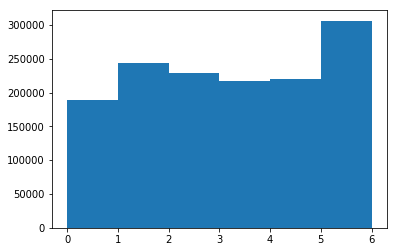

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(stops["date"].dt.weekday, bins=6)

(array([ 77326.,  62827.,  47751.,  31940.,  19376.,  12788.,  20890.,
         49948.,  74605.,  69668.,  71300.,  59211.,  53728.,  55099.,
         56964.,  48813.,  67400.,  70947.,  56161.,  49517.,  54629.,
         78065., 109813., 106956.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

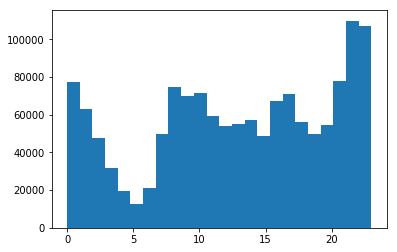

In [19]:
plt.hist(stops["date"].dt.hour, bins=24)

In [20]:
last_year = stops[stops["date"] > datetime.datetime(year=2015, month=2, day=18)]

In [46]:
morning_rush = last_year[(last_year["date"].dt.weekday < 5) & (last_year["date"].dt.hour > 5) & (last_year["date"].dt.hour < 10)]
print(morning_rush.shape)
#last_year.shape

(104125, 21)


In [23]:
# Instalando folium (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
import sys
!{sys.executable} -m pip install folium

    100% |████████████████████████████████| 81kB 6.4MB/s eta 0:00:01
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
